### Schocastic Gradient Descent, actually.

In [18]:
import numpy as numpy
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [19]:
df = make_regression()
df

(array([[ 1.2797841 , -1.10410166,  0.38432779, ...,  0.04622383,
          0.91656275,  0.40456331],
        [ 0.87837652, -0.24673479,  0.95438725, ...,  1.07153433,
          1.88236152, -0.45516455],
        [-0.14073798, -1.50959384, -0.19903108, ...,  1.28218785,
          0.67482957,  1.31962298],
        ...,
        [-0.91340725, -0.39022532,  0.14024732, ...,  0.53305655,
          0.03010106, -1.09886073],
        [-0.05759428,  0.07939363,  0.44691812, ...,  2.2086194 ,
         -0.15336464, -0.56295069],
        [ 2.34788142, -0.26546652,  1.18718248, ..., -0.67580537,
          1.17729289, -0.05644534]]),
 array([-2.87129638e+00,  5.75204118e+01, -8.51745448e+01,  1.44280766e+02,
         2.13535626e+02, -2.40700833e+02, -1.86142287e+02, -1.55690807e+02,
         4.65083245e+01,  3.96067598e+01, -4.25182129e+01, -1.57332430e+02,
        -1.23437991e+02,  6.31054770e+01, -2.73959269e+02, -1.70681025e+01,
         1.76994831e+02,  2.40293852e+02, -1.56967749e+02,  4.2239938

In [20]:
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
sgd = SGDRegressor(max_iter=1000, learning_rate='invscaling', eta0=0.01, random_state=42)
sgd.fit(X_train, y_train)

SGDRegressor(random_state=42)

In [22]:
y_pred = sgd.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Coefficient: {sgd.coef_[0]:.2f}, Intercept: {sgd.intercept_[0]:.2f}")

Mean Squared Error: 104.36
Coefficient: 16.72, Intercept: 0.17


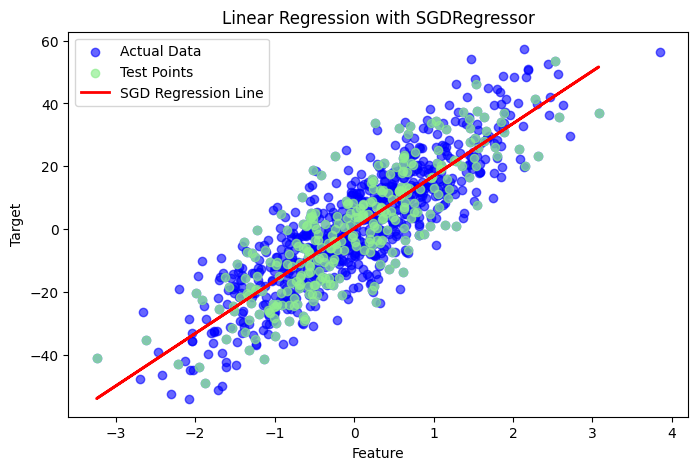

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, color="blue", label="Actual Data", alpha=0.6)
plt.scatter(X_test, y_test, color="lightgreen", label="Test Points", alpha=0.7)
plt.plot(X_test, y_pred, color="red", linewidth=2, label="SGD Regression Line")
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression with SGDRegressor')
plt.legend()
plt.show()

### Manually

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = 2 * X.flatten() + 1 + np.random.randn(100) * 2

In [30]:
w = 0.0 # Slope
b = 0.0 # Intercept
lr = 0.01
n_epochs = 1000

# storing loss for plotting
loss_history = []

In [31]:
for epoch in range(n_epochs):
    y_pred = w * X.flatten() + b
    error = y_pred - y
    loss = np.mean(error ** 2)
    loss_history.append(loss)

    # Calculate gradients
    w_grad = 2 * np.mean(error * X.flatten())
    b_grad = 2 * np.mean(error)

    # Update weights
    w -= lr * w_grad
    b -= lr * b_grad

print(f"Trained params => Slope: {w:.2f}, Intercept: {b:.2f}")


Trained params => Slope: 1.91, Intercept: 1.43


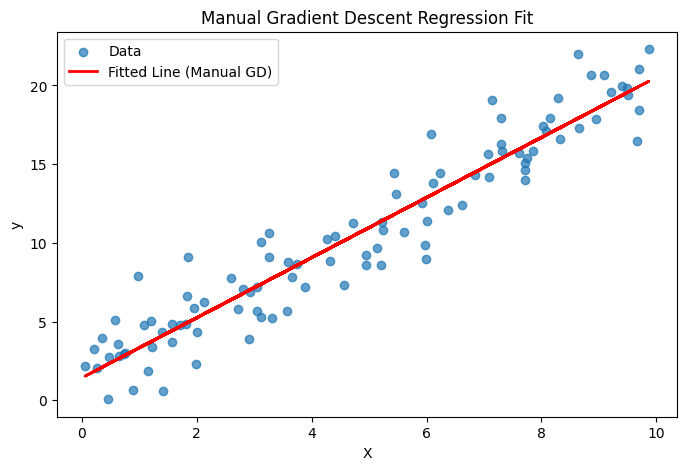

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="Data", alpha=0.7)
plt.plot(X, w * X + b, color="red", label="Fitted Line (Manual GD)", linewidth=2)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Manual Gradient Descent Regression Fit')
plt.legend()
plt.show()
